<div style="color: #ffff;text-align:center;background-color:#26303D;padding:10px;font-size: 60px;font-weight:bold">
Tesla: Stocks Analysis (EDA)
</div>
<div style="color: #ffff;text-align:center;background-color:#26303D;padding:10px;font-size: 20px;">
Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.
<br><br> 
In this notebook, we will discover and explore data from the stock market, particularly Tesla. We will learn how to use finance data to get information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history
</div>
<br>

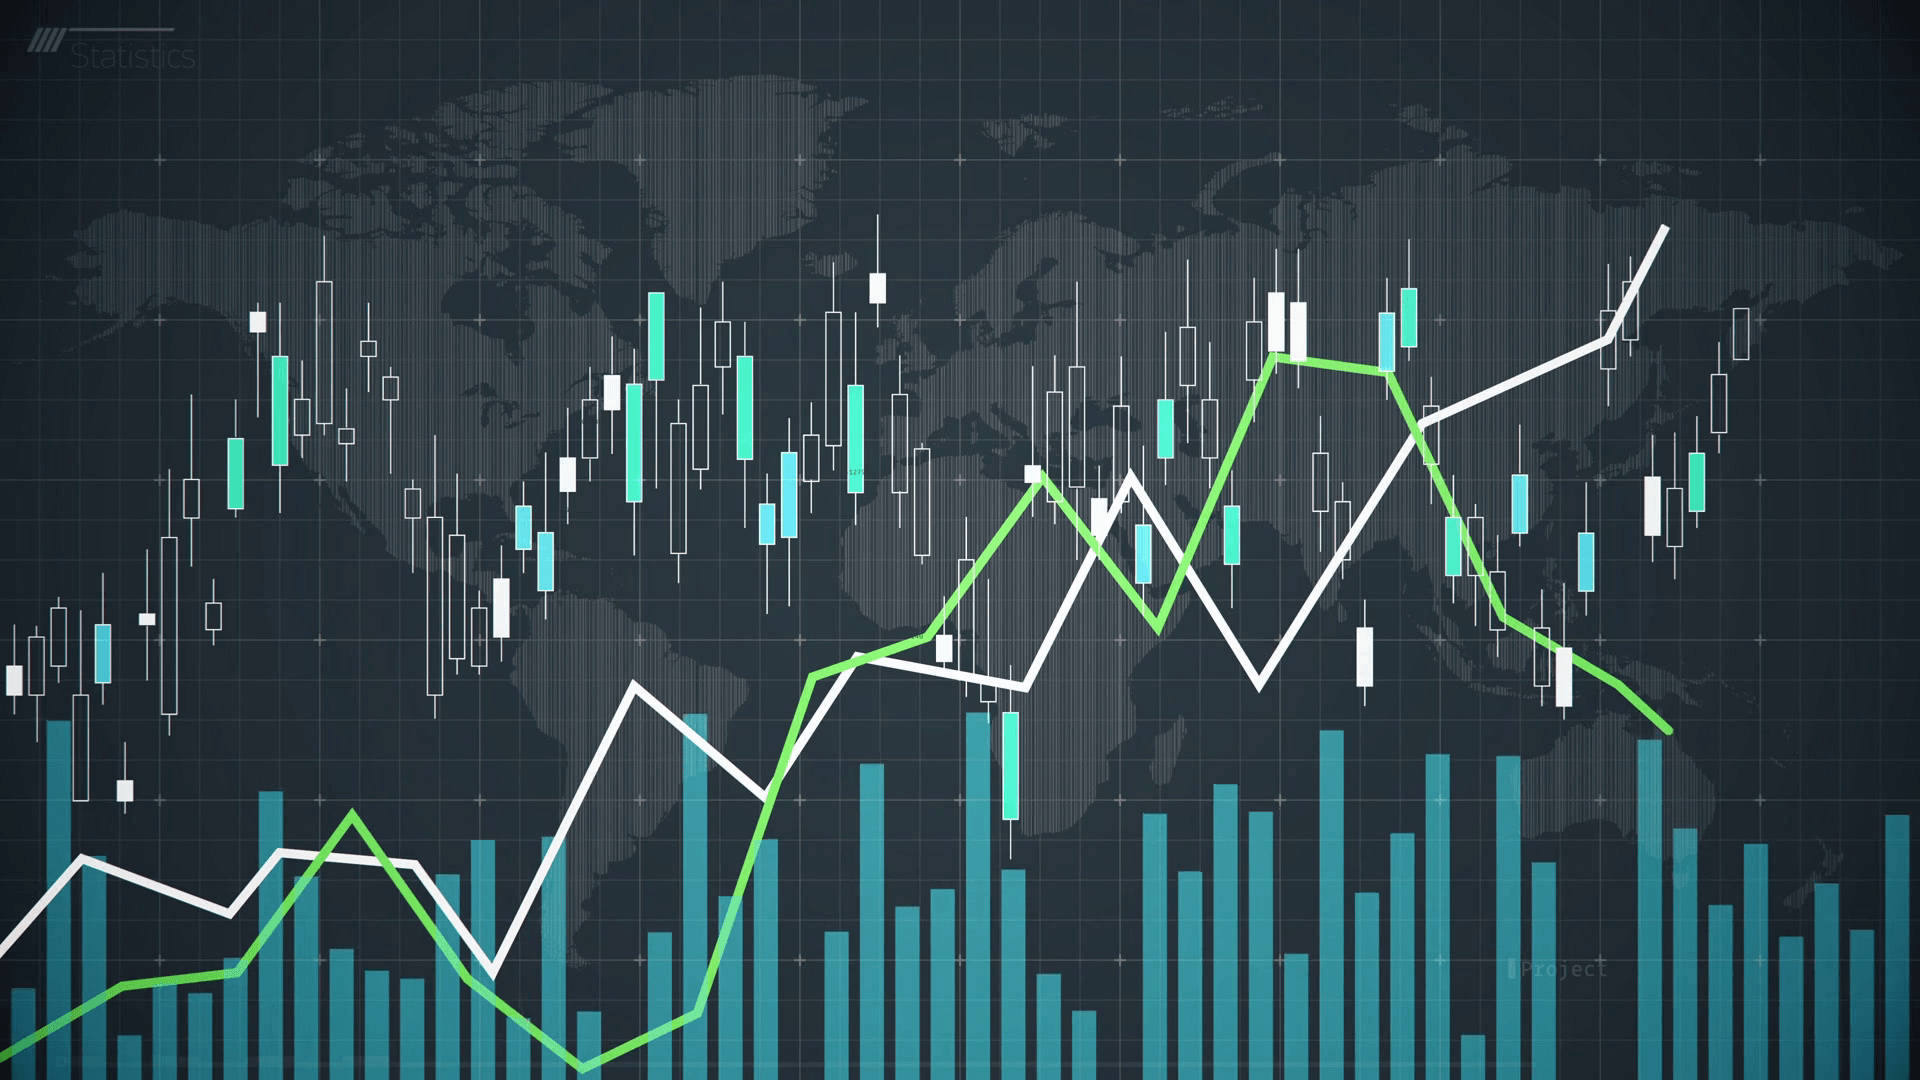



<div style="color: #ffff;text-align:center;background-color:#26303D;padding:10px;font-size: 25px;font-weight:bold">
Load Libraries
</div>

In [263]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
import missingno as msno
import plotly.graph_objects as go
import mplfinance as mpf
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore', category=UserWarning)

<div style="color: #ffff;text-align:center;background-color:#26303D;padding:10px;font-size: 25px;font-weight:bold">
Theme
</div>

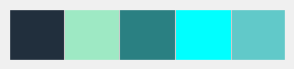

In [264]:
mpl.rcParams["font.size"] = 16

theme_colors = ['#212f3d','#9ee9c4',"#2a8082","cyan","#61c9c9"]
theme_palette = sns.set_palette(sns.color_palette(theme_colors))

sns.palplot(sns.color_palette(theme_colors), size=0.8)
plt.tick_params(axis="both", labelsize=0, length=0)

In [265]:
# data reading
df_tesla = pd.read_csv('/kaggle/input/tesla-stock-price-2005-2023/Tesla_stock_Price.csv') 

In [266]:
# Basic information 
print(df_tesla.shape)
print('-'*30)
print(df_tesla.columns)
print('-'*30)
print(df_tesla.head())
print('-'*30)
print(df_tesla.tail())
print('-'*30)

(3258, 7)
------------------------------
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')
------------------------------
       Date  Price   Open   High    Low   Volume    Chg%
0  1-Apr-11   1.78   1.83   1.88   1.77   42.98M  -3.78%
1  1-Apr-13   2.93   2.82   3.11   2.78  211.59M  15.81%
2  1-Apr-14  14.46  13.93  14.54  13.91  110.57M   4.03%
3  1-Apr-15  12.51  12.58  12.82   12.4   56.92M  -0.56%
4  1-Apr-16  15.84  16.32  16.53  15.55  239.96M   3.39%
------------------------------
           Date   Price    Open    High     Low   Volume    Chg%
3253  30-Sep-16   13.60   13.48   13.67    13.3   38.79M   1.64%
3254  30-Sep-19   16.06   16.20   16.27   15.74   89.19M  -0.50%
3255  30-Sep-20  143.00  140.44  144.64  140.16  144.44M   2.37%
3256  30-Sep-21  258.49  260.33  263.04  258.33   53.87M  -0.75%
3257  30-Sep-22  265.25  266.14  275.57  262.47   67.73M  -1.10%
------------------------------


<div style="color: #ffff;text-align:center;background-color:#26303D;padding:10px;font-size: 25px;font-weight:bold">
Data Cleaning
</div>

# **Type casting**

In [267]:
# function used for type casting 

def low_fun(n):
    try:
        return float(n)
    except:
        return np.nan
    
def vol_fun(num):
    try:
        return float(num)
    except:
        return np.nan 

In [268]:
# for date column
df_tesla['Date'] = pd.to_datetime(df_tesla['Date'],errors='coerce')
# for Low column
df_tesla['Low'] = df_tesla['Low'].apply(low_fun) 
# for Volume column 
df_tesla['Volume'] = df_tesla['Volume'].str.split('M').str.get(0).apply(vol_fun) 
# for change% column 
df_tesla['Chg%'] = df_tesla['Chg%'].str.split('%').str.get(0).astype('float32') 


# **Null Value Handling**

In [269]:
#Checking number of null values in each column
df_tesla.isnull().sum()

Date       80
Price      80
Open       80
High       80
Low       120
Volume    120
Chg%      120
dtype: int64

In [270]:
#Checking the percentage of missing values in each column
round(100*(df_tesla.isnull().sum()/len(df_tesla.index)), 2) 

Date      2.46
Price     2.46
Open      2.46
High      2.46
Low       3.68
Volume    3.68
Chg%      3.68
dtype: float64

In [271]:
df_tesla['Price'].fillna(df_tesla['Price'].mean() ,inplace=True)
df_tesla['Open'].fillna(df_tesla['Open'].mean() ,inplace=True)
df_tesla['High'].fillna(df_tesla['High'].mean() ,inplace=True)
df_tesla['Low'].fillna(df_tesla['Low'].mean() ,inplace=True)
df_tesla['Volume'].fillna(df_tesla['Volume'].mean() ,inplace=True)
df_tesla['Chg%'].fillna(df_tesla['Chg%'].mean() ,inplace=True) 

df_tesla.dropna(subset={'Date'},inplace=True)

round(100*(df_tesla.isnull().sum()/len(df_tesla.index)), 2) 

Date      0.0
Price     0.0
Open      0.0
High      0.0
Low       0.0
Volume    0.0
Chg%      0.0
dtype: float64

In [272]:
#Calculating the data loss
100-round(100*len(df_tesla.index)/3258,2) 

2.4599999999999937

**We lost 2.45 data in data cleaning**

***

# **Exploration** 
### **We'll be answering the following questions along the way:**

- What was the change in price of the stock over time?

- Perform different time sampling

- What was the daily return of the stock on average?

- What was the moving average of the various stocks?

- What was the correlation between different component of stocks'?



<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 25px;font-weight:bold">
What was the change in price of the stock over time
</div>
<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 15px;">
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.
</div>

In [273]:
# Make it TimeSeries, for analysis
df_tesla.set_index('Date', inplace=True)
df_tesla.sort_index(inplace=True) 

## Descriptive Statistics about the Data
**`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.**

**Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.**

In [274]:
df_tesla.describe()

,Price,Open,High,Low,Volume,Chg%
count,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000
mean,59.330355,59.363970,60.711009,57.884063,93.821612,0.222282
std,94.758509,94.855811,97.061127,92.393527,81.265055,3.598351
min,1.050000,1.080000,1.110000,1.000000,1.780000,-21.059999
25%,9.212500,9.272500,9.492500,8.970000,42.660000,-1.490000
50%,16.415000,16.415000,16.625000,16.160000,76.590000,0.130000
75%,32.632500,32.915000,34.257500,31.595000,117.295000,1.930000
max,409.970000,411.470000,414.500000,405.670000,914.080000,24.459999


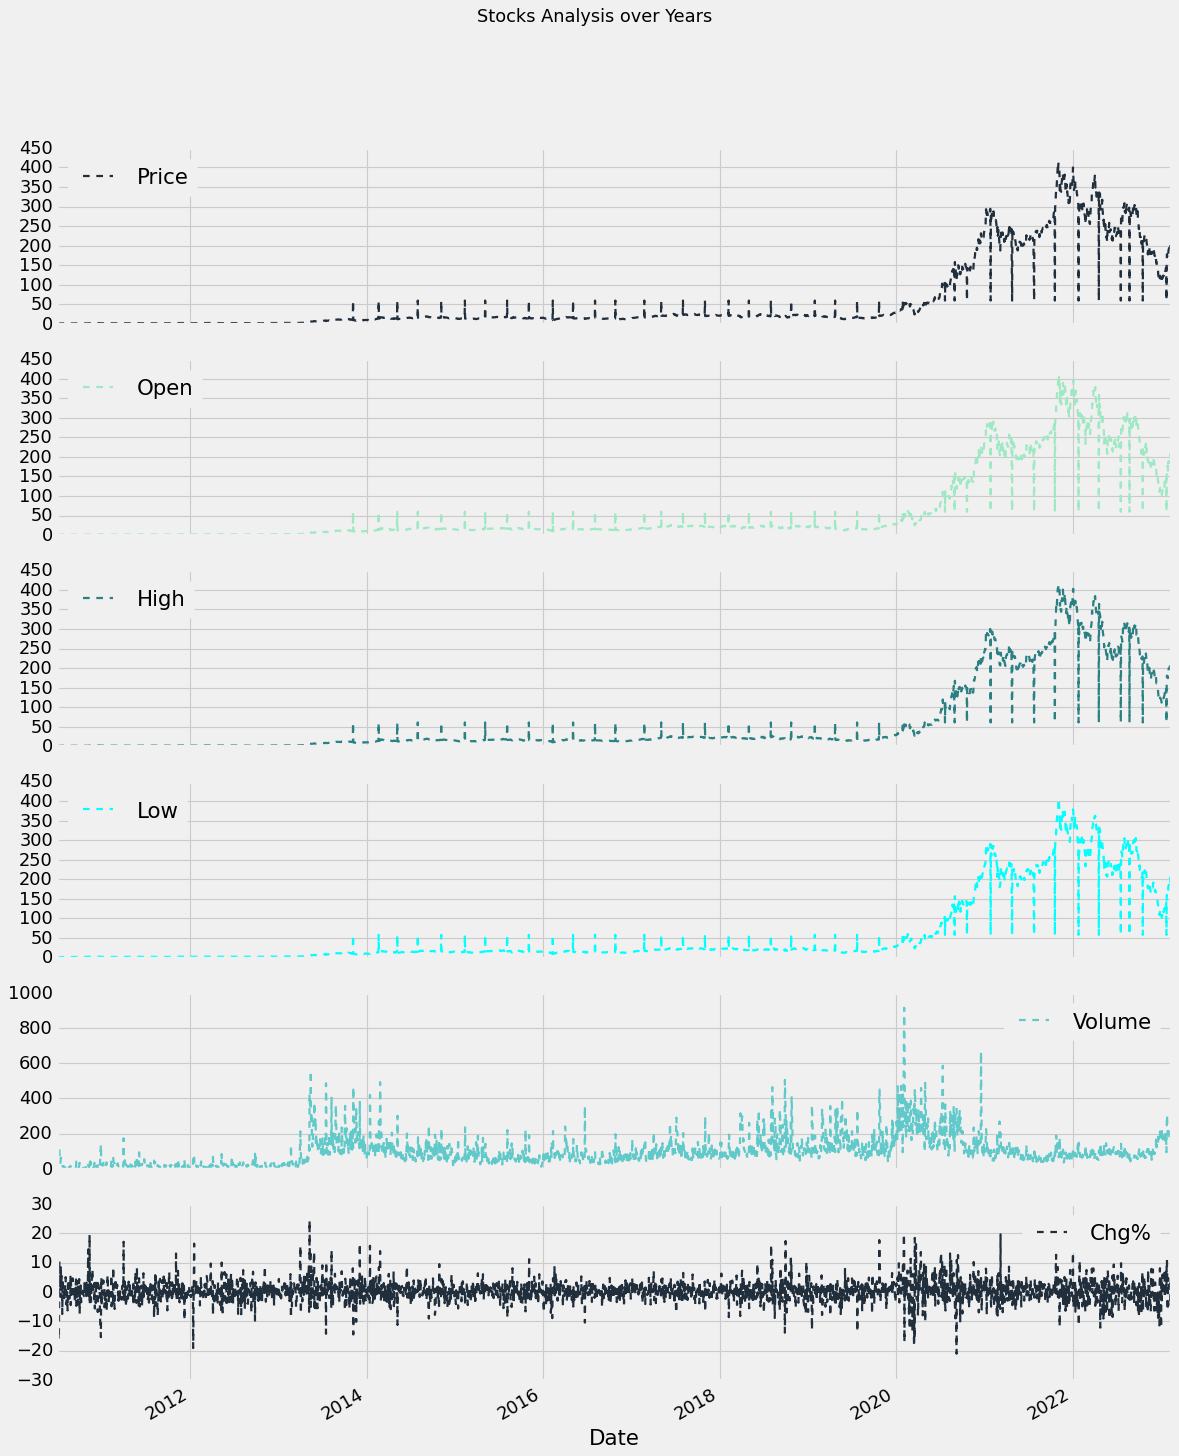

In [275]:
df_tesla.plot(subplots=True,figsize=(16,22),title='Stocks Analysis over Years',linestyle='--',linewidth=2)
plt.show() 

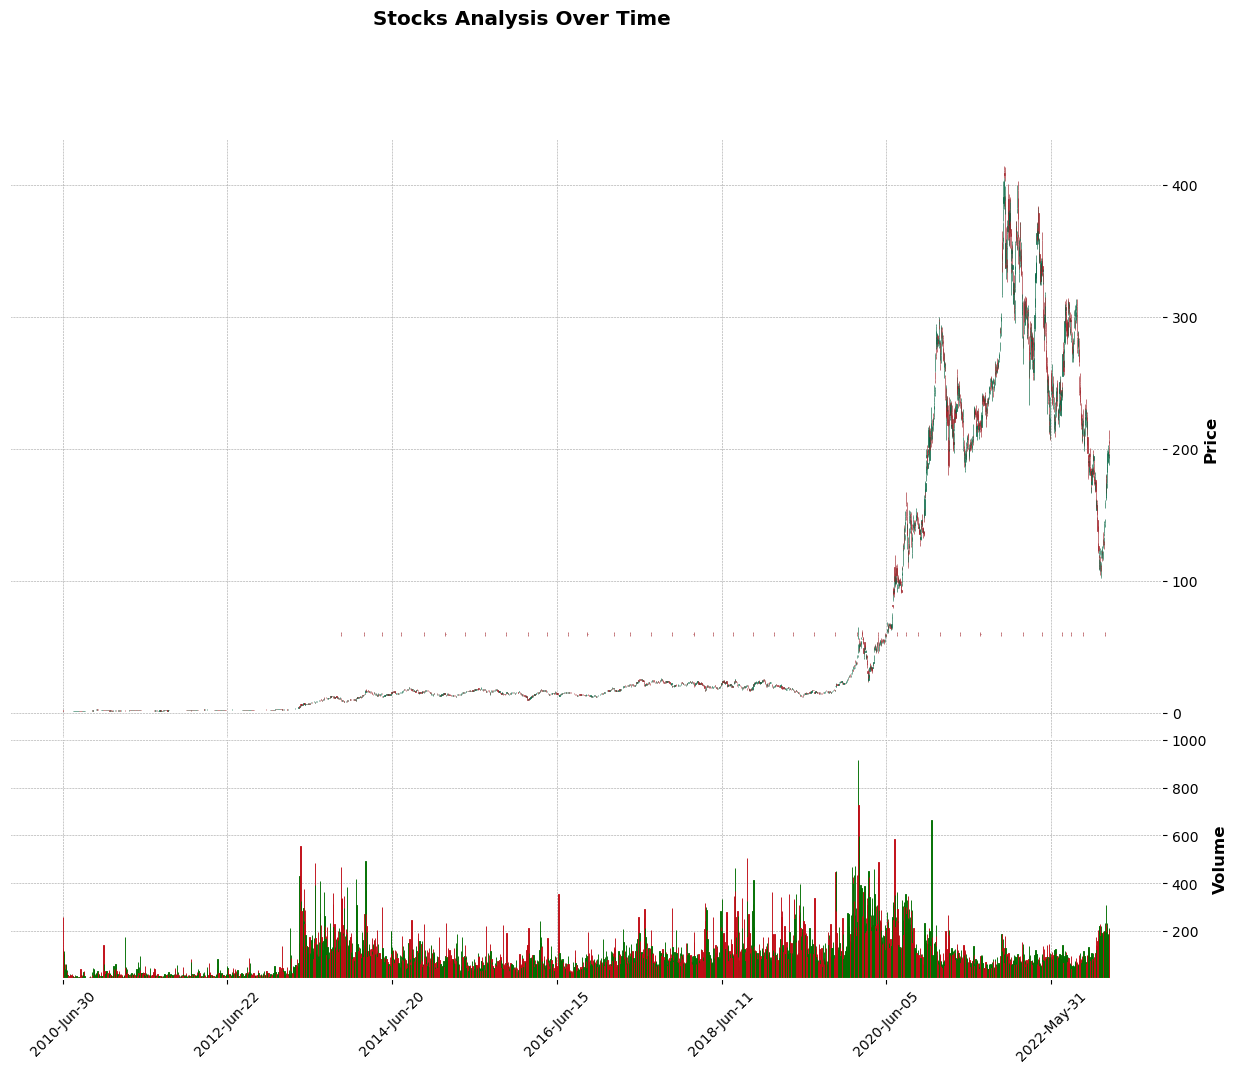

In [276]:
df_tesla = df_tesla.rename(columns={'Price':'Close'})
df_tesla1 = df_tesla[['Close','Open','High','Low','Volume']] 

# create a custom style for the chart

custom_style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 10})

# plot the candlestick chart
mpf.plot(df_tesla, type='candle', style=custom_style, volume=True, ylabel='Price',figsize=(16,12),title=('Stocks Analysis Over Time'))
mpf.show() 

**In chart, red and green are commonly used to represent price movements. When the closing price is higher than the opening price, the candlestick is colored green to indicate a price increase. When the closing price is lower than the opening price, the candlestick is colored red to indicate a price decrease.**

In [277]:
# Which is the date of the lowest price of the stock? 
y = df_tesla[df_tesla['Close'] == df_tesla['Close'].min()].index[0]   
print(y.day_name(),y.day,'th',y.month_name(),y.year) 

Wednesday 7 th July 2010


In [278]:
# Which is the date of the highest price of the stock?
x = df_tesla[df_tesla['Close'] == df_tesla['Close'].max()].index[0]   
print(x.day_name(),x.day,'th',x.month_name(),x.year) 

Thursday 4 th November 2021


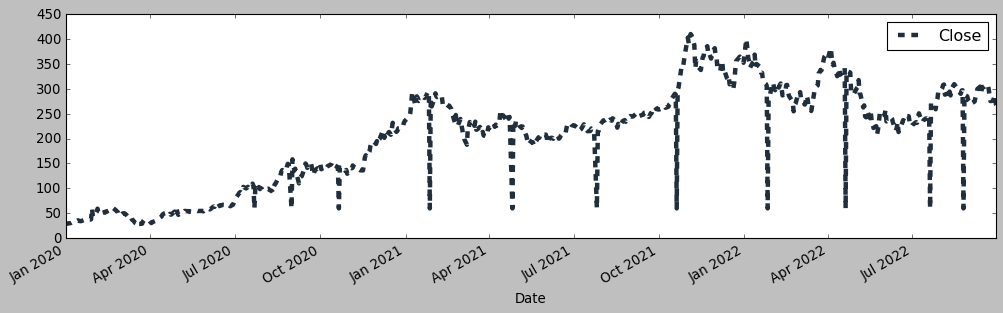

In [279]:
# show the graph ,rose subsequently
# apply xlimit and y limit
plt.style.use('classic')
df_tesla['Close'].plot(xlim=['2020/01/01','2022/09/29'],ls='--',lw=4, figsize=(15,4),color='#212f3d') 
plt.legend() 
plt.show() 

In [280]:
# tesla stocks open for 2021 
share_open = df_tesla.loc['2021/01/01':'2021/12/31']['Open']  
index = share_open.index 
share_open.head(5) 

Date
2021-01-04    239.82
2021-01-05    241.22
2021-01-06    252.83
2021-01-07    259.21
2021-01-08    285.33
Name: Open, dtype: float64

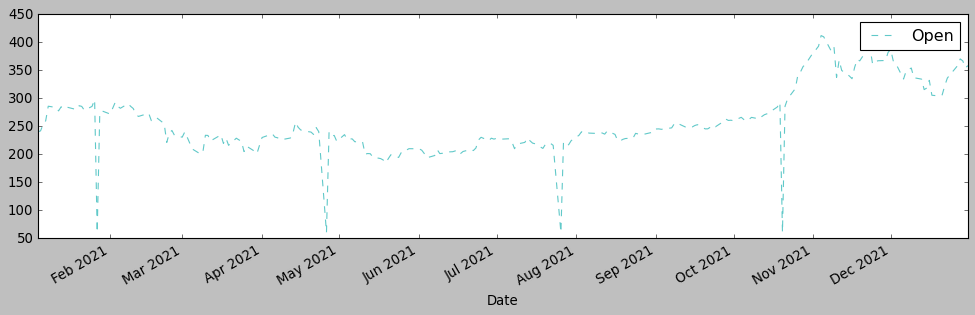

In [281]:
share_open.plot(ls='--', figsize=(15,4),color='#61c9c9') 
plt.legend() 
plt.show() 

<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 25px;font-weight:bold">
Perform different time sampling
</div>
<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 15px;">
In time series, data consistency is of prime importance, resampling ensures that the data is distributed with a consistent frequency. Resampling can also provide a different perception of looking at the data, in other words, it can add additional insights about the data based on the resampling frequency.
</div>

In [282]:
# minimum share price in evey year end
df_tesla.resample(rule='A').min() 

,Close,Open,High,Low,Volume,Chg%
Date,,,,,,
2010-12-31,1.050000,1.080000,1.110000,1.000000,1.780000,-16.410000
2011-12-31,1.460000,1.450000,1.480000,1.410000,3.590000,-9.650000
2012-12-31,1.520000,1.770000,1.790000,1.510000,5.470000,-19.150000
2013-12-31,2.190000,2.210000,2.230000,2.140000,6.630000,-14.500000
2014-12-31,9.290000,9.370000,9.800000,9.110000,20.000000,-11.250000
2015-12-31,12.330000,12.390000,12.620000,12.090000,10.650000,-8.880000
2016-12-31,9.870000,9.490000,10.470000,9.400000,24.890000,-10.450000
2017-12-31,14.470000,14.320000,14.690000,14.060000,32.800000,-7.230000
2018-12-31,16.700000,16.850000,17.360000,16.310000,46.210000,-13.900000


In [283]:
# maximum share price in evey year
grid = df_tesla.resample(rule='A').max() 
grid

,Close,Open,High,Low,Volume,Chg%
Date,,,,,,
2010-12-31,2.360000,2.390000,2.430000,2.320000,257.92,19.510000
2011-12-31,2.330000,2.310000,2.330000,2.270000,172.84,17.090000
2012-12-31,2.530000,2.550000,2.660000,2.470000,85.27,16.450001
2013-12-31,59.687725,59.743634,61.025938,57.884063,557.46,24.459999
2014-12-31,59.687725,59.743634,61.025938,57.884063,491.96,15.720000
2015-12-31,59.687725,59.743634,61.025938,57.884063,234.74,11.160000
2016-12-31,59.687725,59.743634,61.025938,57.884063,356.14,8.800000
2017-12-31,59.687725,59.743634,61.025938,57.884063,296.87,7.280000
2018-12-31,59.687725,59.743634,61.025938,57.884063,504.75,17.340000


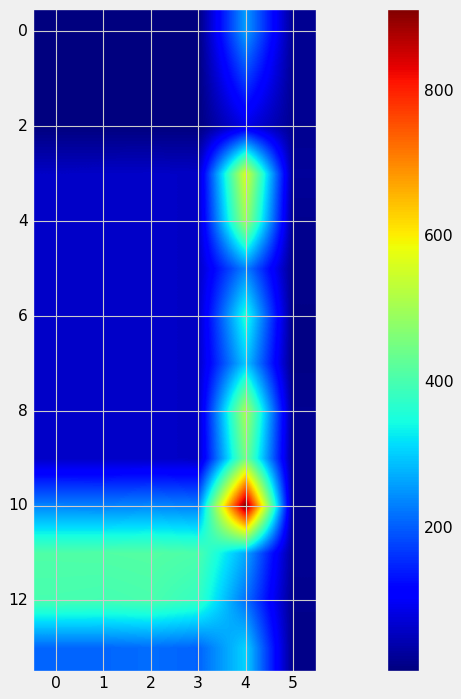

In [284]:
# Showing the volume of 2021 is very high
plt.style.use('fivethirtyeight') 
plt.figure(figsize=(20,10))
plt.imshow(grid)
plt.colorbar()

<AxesSubplot:xlabel='Date'>

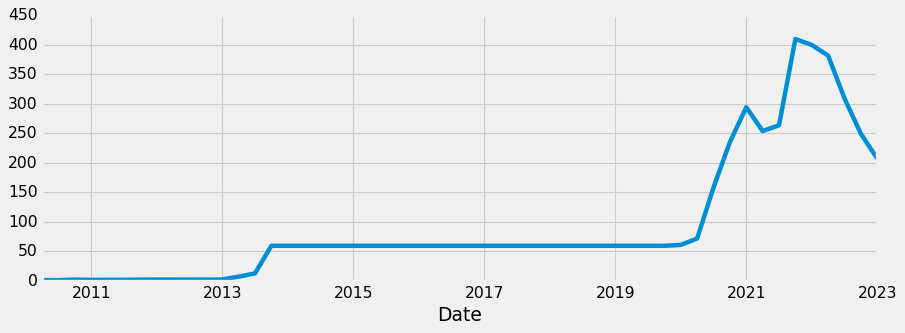

In [285]:
# maximum share price in evey quarter start
df_tesla.resample(rule='QS').max()['Close'].plot(figsize=(12,4)) 

<AxesSubplot:xlabel='Date'>

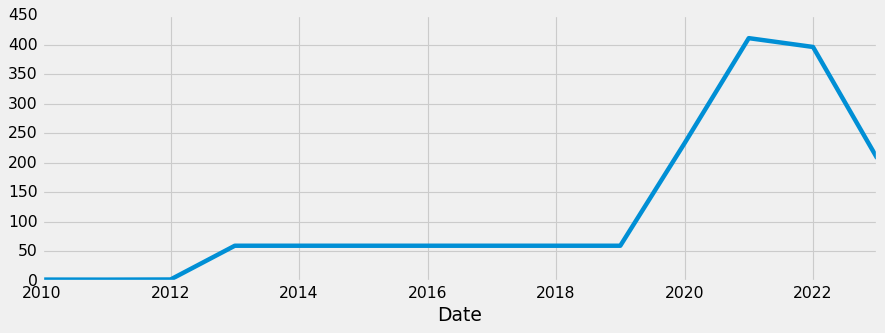

In [286]:
# maximum share open in evey Business year end
df_tesla.resample(rule='BA').max()['Open'].plot(figsize=(12,4)) 

In [287]:
# mean share volume in every month
df_tesla.resample(rule='M').mean()['Open']

Date
2010-06-30      1.720000
2010-07-31      1.338095
2010-08-31      1.303636
2010-09-30      1.385238
2010-10-31      1.381905
                 ...    
2022-10-31    216.503506
2022-11-30    193.478571
2022-12-31    155.896190
2023-01-31    128.206182
2023-02-28    192.790000
Freq: M, Name: Open, Length: 153, dtype: float64

<AxesSubplot:xlabel='Date'>

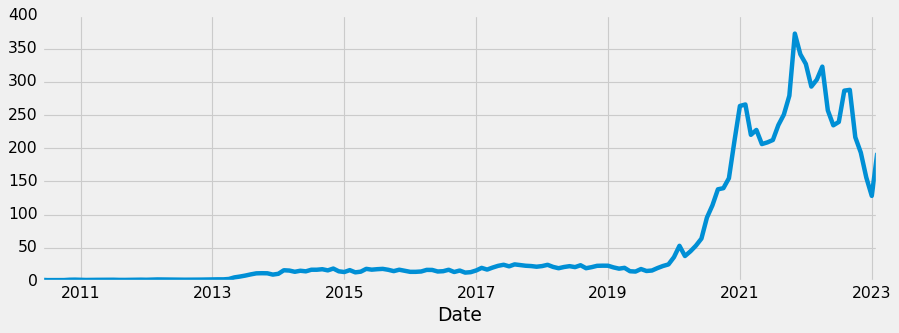

In [288]:
# plot
df_tesla.resample(rule='M').mean()['Open'].plot(kind='line',figsize=(12,4)) 

In [289]:
# applying aggregate function upto specific date or index or on a DataFrame window -- rolling
# remove noise - make smoothing
# mean share close for starting 10 days of 2022 
df_tesla.loc['2022/01/01':'2022/02/01']['Close'].rolling(7).mean() 

Date
2022-01-03           NaN
2022-01-04           NaN
2022-01-05           NaN
2022-01-06           NaN
2022-01-07           NaN
2022-01-10           NaN
2022-01-11    364.367143
2022-01-12    359.911429
2022-01-13    354.290000
2022-01-14    352.455714
2022-01-18    350.827143
2022-01-19    349.335714
2022-01-20    346.390000
2022-01-21    340.651429
2022-01-24    332.260000
2022-01-25    326.871429
2022-01-26    285.416818
2022-01-27    275.826818
2022-01-28    268.718246
2022-01-31    265.882532
2022-02-01    265.281104
Name: Close, dtype: float64

<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 25px;font-weight:bold">
What was the moving average of the various stocks?
</div>
<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 15px;">
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.
</div>

In [290]:
df_tesla['Open: 10 days rolling']= df_tesla['Open'].rolling(10).mean() 
df_tesla['Open: 30 days rolling']= df_tesla['Open'].rolling(30).mean() 
df_tesla['Open: 50 days rolling']= df_tesla['Open'].rolling(50).mean() 

Text(0.5, 0, 'Years')

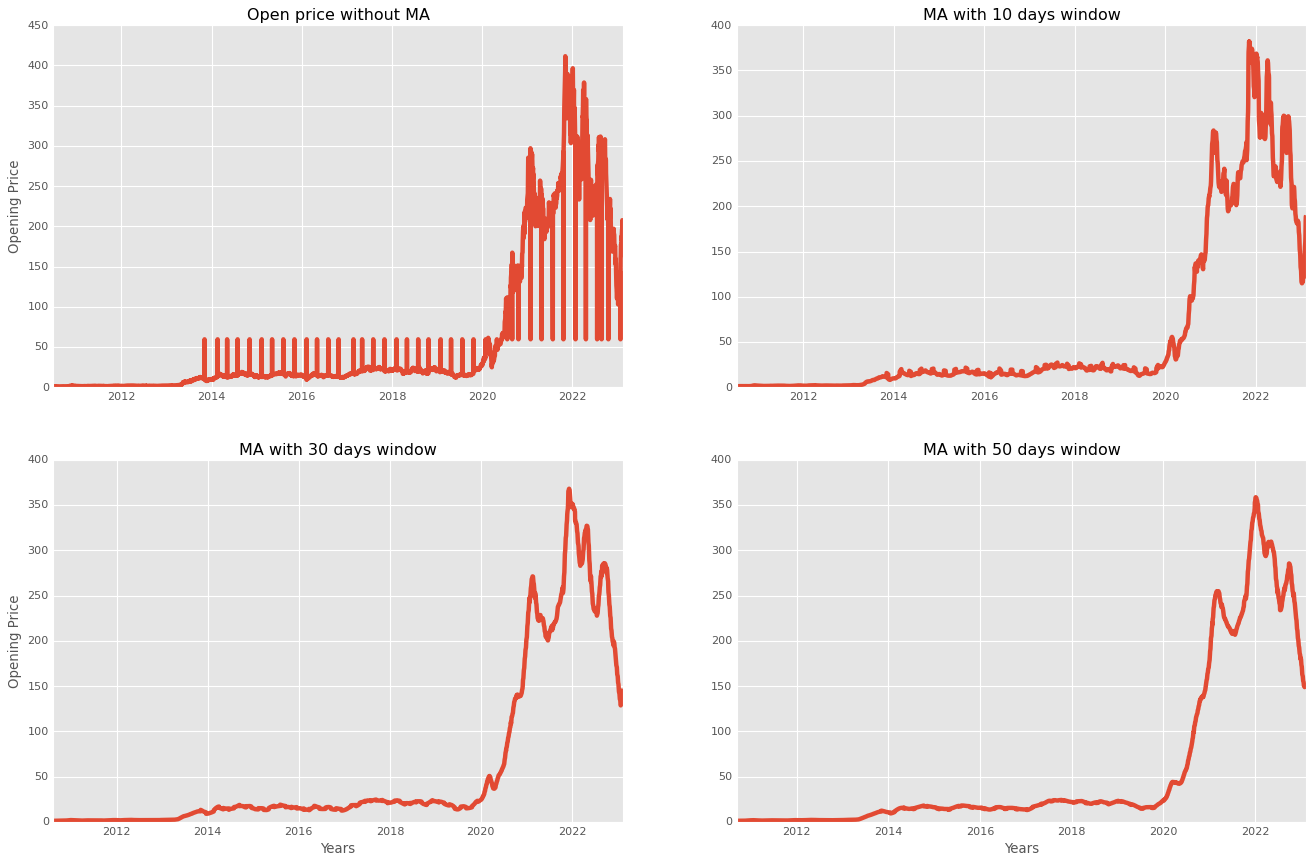

In [291]:
plt.style.use('ggplot') 

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(18,12), )
ax[0,0].plot(df_tesla.index,df_tesla['Open'])  
ax[0,0].set_title('Open price without MA')
ax[0,0].set_ylabel('Opening Price') 


ax[0,1].plot(df_tesla.index,df_tesla['Open: 10 days rolling'])  
ax[0,1].set_title('MA with 10 days window')

ax[1,0].plot(df_tesla.index,df_tesla['Open: 30 days rolling'])
ax[1,0].set_title('MA with 30 days window')
ax[1,0].set_ylabel('Opening Price') 
ax[1,0].set_xlabel('Years') 



ax[1,1].plot(df_tesla.index,df_tesla['Open: 50 days rolling'])  
ax[1,1].set_title('MA with 50 days window')
ax[1,1].set_xlabel('Years') 



<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 25px;font-weight:bold">
What was the daily return of the stock on average
</div>
<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 15px;">
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the stock.
</div>

<AxesSubplot:xlabel='Date', ylabel='Change(%)'>

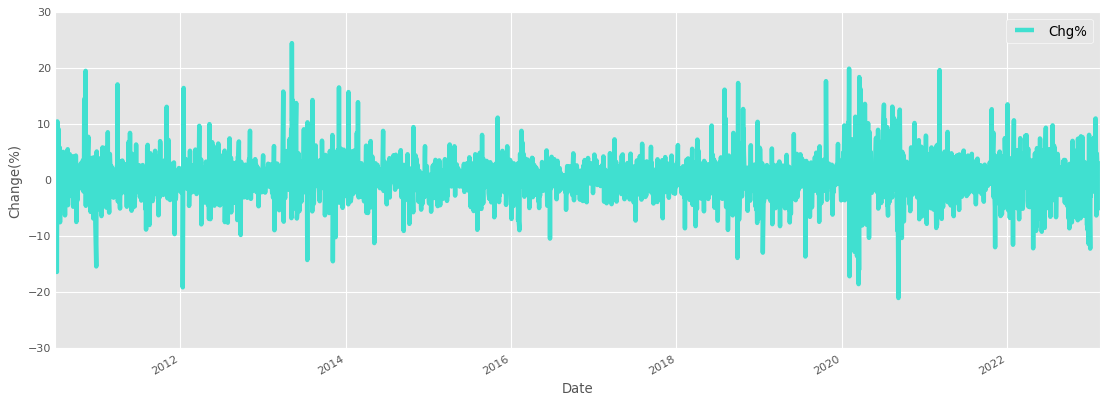

In [292]:
df_tesla['Chg%'].plot(kind='line',ylabel='Change(%)',figsize=(15,6),legend=True,color='Turquoise')  

* Great, now let's get an overall look at the average daily return using a histogram. 

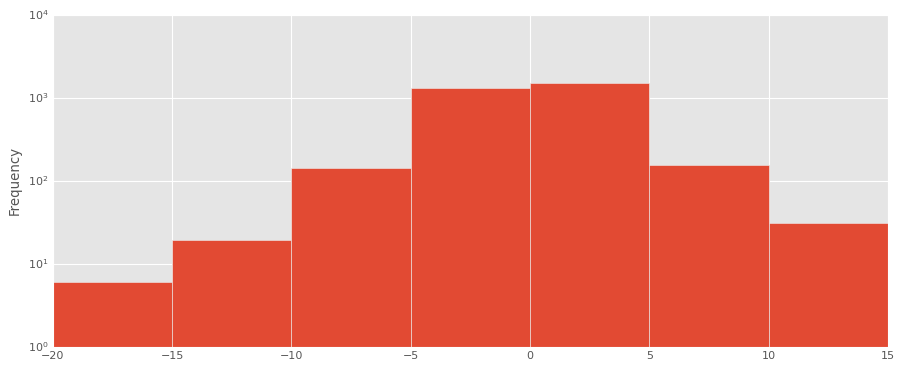

In [293]:
# with histogram 
df_tesla['Chg%'].plot(kind='hist',xlabel='Daily Returns',bins=[-20,-15,-10,-5,0,5,10,15],figsize=(12,5))
plt.yscale('log') 

<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 25px;font-weight:bold">
What was the correlation between  stocks closing and opening prices?
</div>
<div style="color: #ffff;text-align:left;background-color:#26303D;padding:10px;font-size: 15px;">
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

</div>

<AxesSubplot:xlabel='Close', ylabel='Open'>

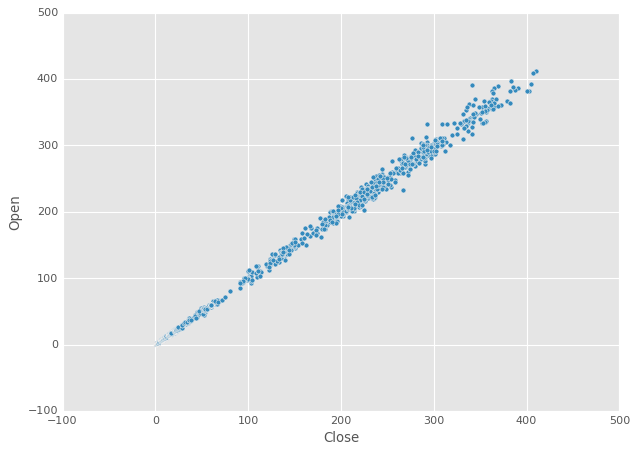

In [297]:
# between opening and closing price 
df_tesla[['Close','Open']].plot(kind='scatter',x='Close',y='Open') 

<AxesSubplot:xlabel='High', ylabel='Low'>

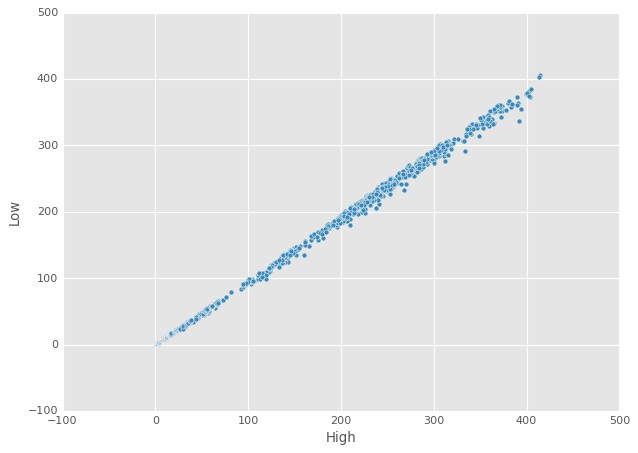

In [298]:
df_tesla.plot(kind='scatter',x='High',y='Low')